In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089"
yulu = pd.read_csv(url)
display(yulu.head(7))

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2


#**Descriptive Statistics**

In [3]:
yulu.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [4]:
yulu.shape

(10886, 12)

In [5]:
yulu['season'].value_counts(normalize=True)

season
4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: proportion, dtype: float64

In [6]:
yulu['holiday'].value_counts(normalize=True)

holiday
0    0.971431
1    0.028569
Name: proportion, dtype: float64

In [7]:
yulu['workingday'].value_counts(normalize=True)

workingday
1    0.680875
0    0.319125
Name: proportion, dtype: float64

In [8]:
yulu['weather'].value_counts(normalize=True)

weather
1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: proportion, dtype: float64

###**Inferences:**
- Data includes 10.8K hours of cycle rental counts and weather conditions over 2 years.
- Seasons are distributed evenly with 4 seasons.
- 68% of data is from working days, 31% from non-working days.
- Most frequent weather is category -1 (Clear, Few clouds, partly cloudy, partly cloudy).
- Only 1 hour recorded a weather of category 4.
- Mean temperature is 20.23°C, with max at 41°C and min at 0.82°C.
- Mean felt temperature is 23.65°C, with max at 45°C and min at 0.7°C.
- Mean humidity is 61 g/m³, with max at 100 g/m³ and min at 0 g/m³.
- Windspeed between 7km/hr and 17km/hr (25th to 75th percentile).
- Average count of casual users per hour is 36, max is 367, min is 0.
- Average count of registered users per hour is 155, max is 886, min is 0.
- Average count of total rental bikes per hour (casual + registered) is 191.

#**Visual Analysis**

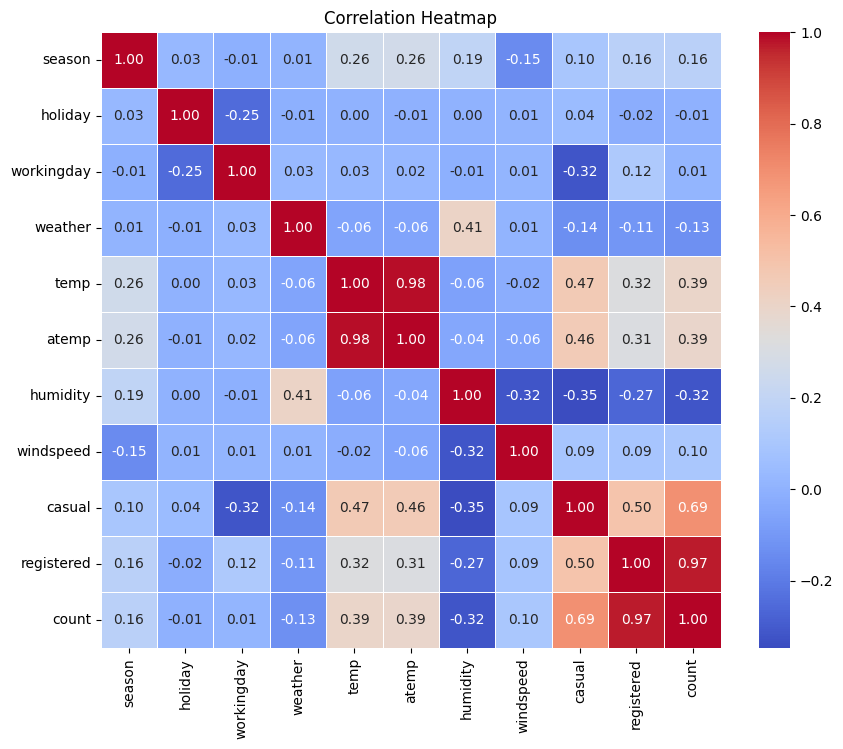

In [13]:
plt.figure(figsize=(10, 8))
yulu_dup = yulu.drop(columns=['day', 'datetime', 'date', 'month', 'year', 'time', 'onlydate', 'weekend'])
sns.heatmap(yulu_dup.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- Higher humidity levels are associated with lower bike rental counts, suggesting that as humidity rises, the demand for bikes tends to decrease. Conversely, lower humidity levels are linked to higher rental counts.
- Conversely, there is a positive relationship between the count of bike rentals and the apparent temperature (atemp). This indicates that as the apparent temperature increases, the demand for bike rentals also tends to increase, and vice versa.
- In summary, humidity and apparent temperature have contrasting effects on bike rental counts, with humidity showing a negative correlation and apparent temperature showing a positive correlation.

Therefore, it can be concluded that weather conditions, specifically humidity and apparent temperature, significantly influence bike rental demand, with higher humidity levels associated with decreased rentals and higher apparent temperatures linked to increased rentals.
***
###**Univariate Analysis**

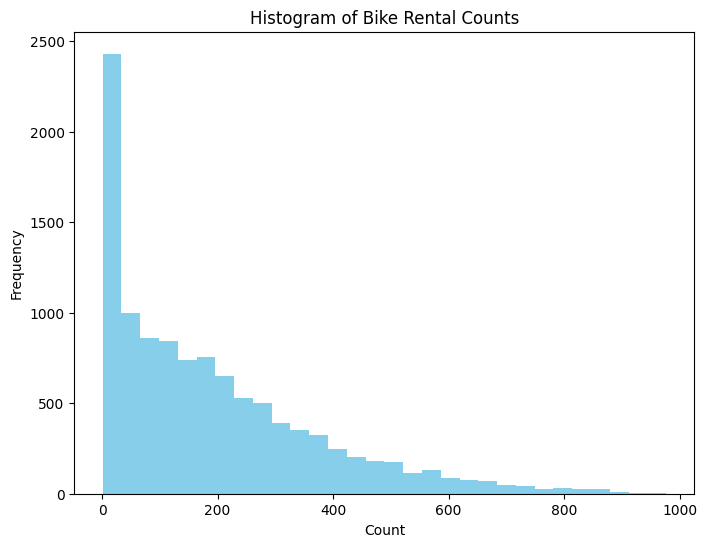

In [16]:
# Plot histogram for the 'count' variable
plt.figure(figsize=(8, 6))
plt.hist(yulu['count'], bins=30, color='skyblue')
plt.title('Histogram of Bike Rental Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

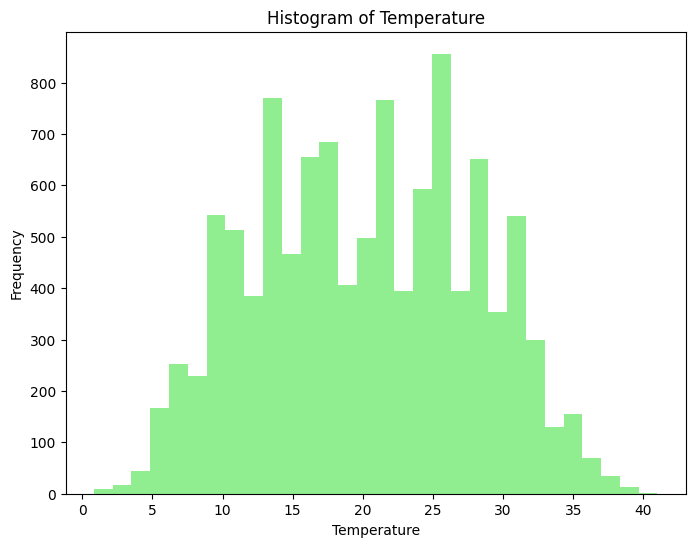

In [18]:
# Plot histogram for the 'temp' variable (temperature)
plt.figure(figsize=(8, 6))
plt.hist(yulu['temp'], bins=30, color='lightgreen')
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

<ipython-input-20-1583786dca39>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weather', data=yulu, palette='viridis')


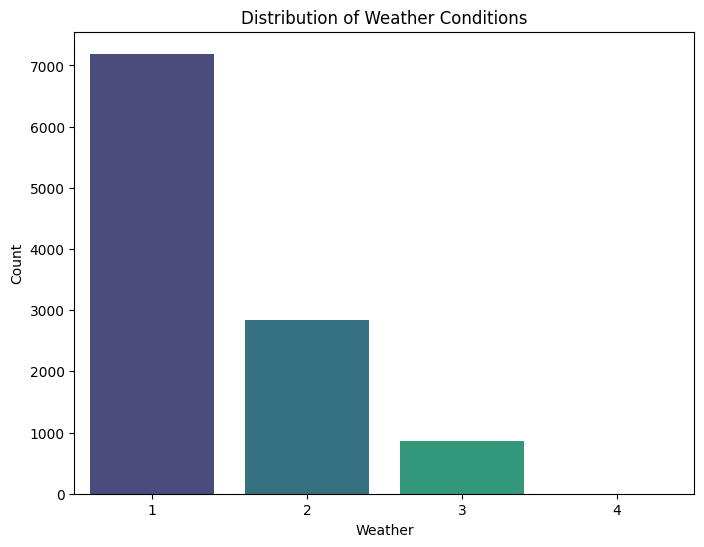

In [20]:
# Plot histogram for the 'weather' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='weather', data=yulu, palette='viridis')
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

<ipython-input-22-8e7e2300f80b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season', data=yulu, palette='muted')


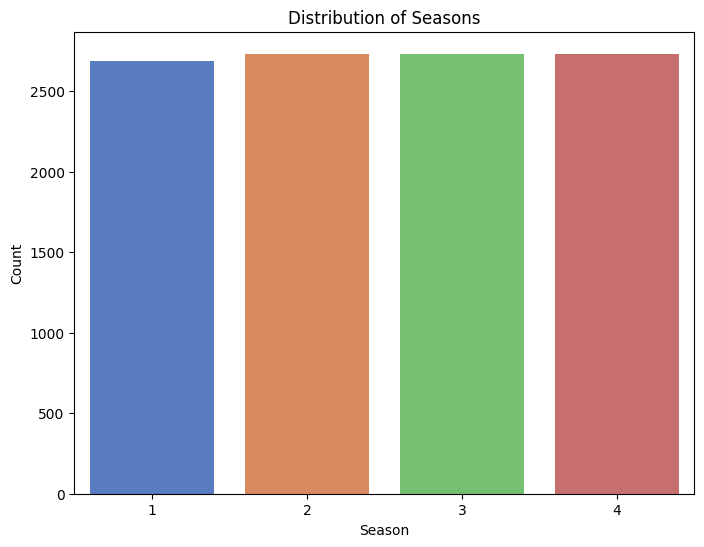

In [22]:
# Plot histogram for the 'season' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='season', data=yulu, palette='muted')
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

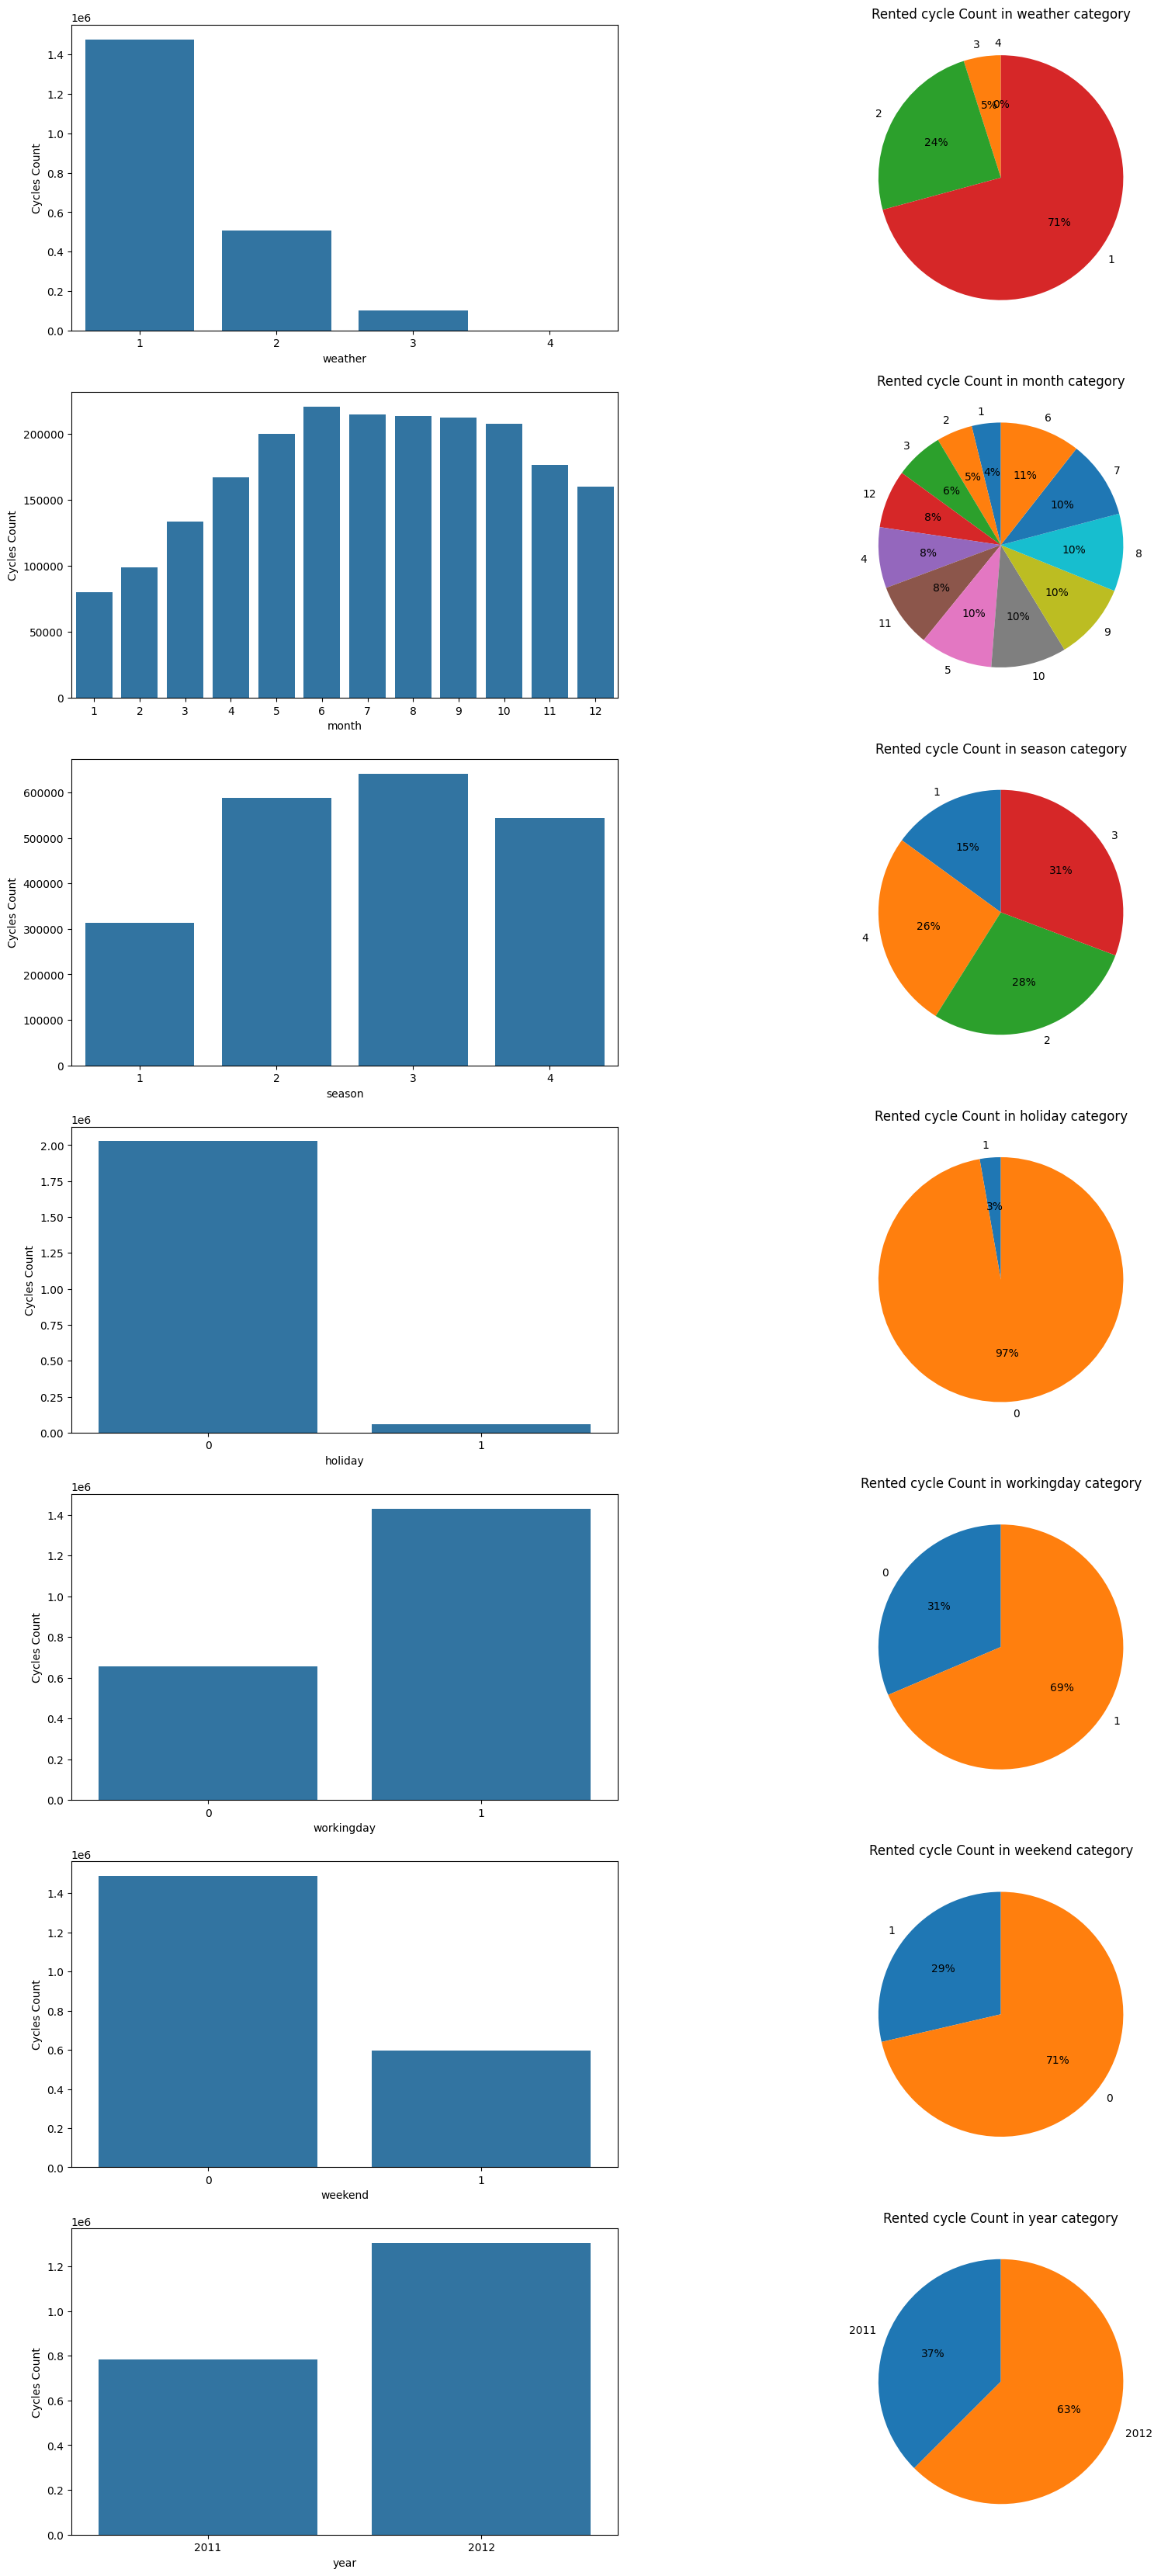

In [28]:
df = yulu
colnames=['weather', 'month','season', 'holiday', 'workingday', 'weekend', 'year']
plt.figure(figsize = (20, len(colnames)*6 ))
k=1
for colname in colnames:
  plt.subplot(len(colnames),2,k)
  s = yulu.groupby(colname)['count'].sum().sort_values(ascending=True)
  s_df = pd.DataFrame({colname: s.index, 'count': s.values})
  g = sns.barplot(data=s_df, x=colname, y='count')
  g.set_ylabel("Cycles Count")
  g.set_xlabel(f"{colname}")
  k+=1
  plt.subplot(len(colnames),2,k)
  plt.pie(s, labels=s.index, autopct='%.0f%%', startangle=90)
  plt.title(f'Rented cycle Count in {colname} category')
  k+=1

1. Season: The highest number of bike rentals occurs during season 3, with season 2, 4, and 1 following in descending order.
2. Weather: Most bike rentals happen during weather condition 1, followed by 2 and 3. Weather condition 4 was observed only once in the two-year period.
3. Apparent Temperature (Atemp): The average temperature during bike rentals ranges from 17 to 31 degrees Celsius.
4. Humidity: Generally, humidity levels range from 47 to 77, with some instances of outliers at 0.
5. Windspeed: Windspeed typically ranges from 7 to 17 km/hr, with the 25th to 75th percentile falling within this range.
6. Casual Users: On average, there are 36 casual users renting bikes per hour. The maximum number of casual users recorded in an hour was 367, with a minimum of 0.
7. Registered Users: The average count of registered users renting bikes per hour is 155. The maximum number of registered users in an hour was 886, with a minimum of 0.
8. Rental Trends:
* In 2012, there was a significant increase in bike rental counts (63%) compared to 2011 (37%).
* Only 21% of bike rentals occurred over the weekends, with weekdays contributing 79% to the total bike rental count.
* June had the highest share of bike rentals (11% of total rentals), followed by May, July, August, September, and October (all at 10% of total rentals).
* The highest number of bike rentals occurred during season 3, followed by season 2.
* Bike rentals were highest during weather category 1 (71%), followed by weather category 2 (24%).

***

###**Bivariate Analysis**

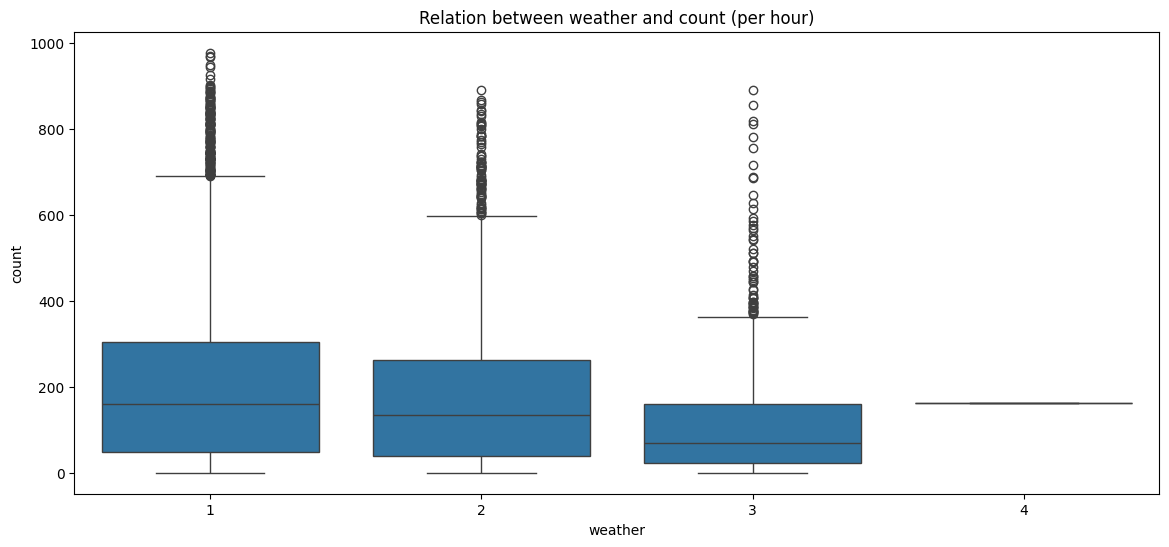

In [30]:
plt.figure(figsize = (14,6))
sns.boxplot(data=yulu, x='weather', y= 'count')
plt.title("Relation between weather and count (per hour)")
plt.show()

<ipython-input-31-07c7c04eff83>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=yulu, x='season', y= 'count', palette='gist_earth')


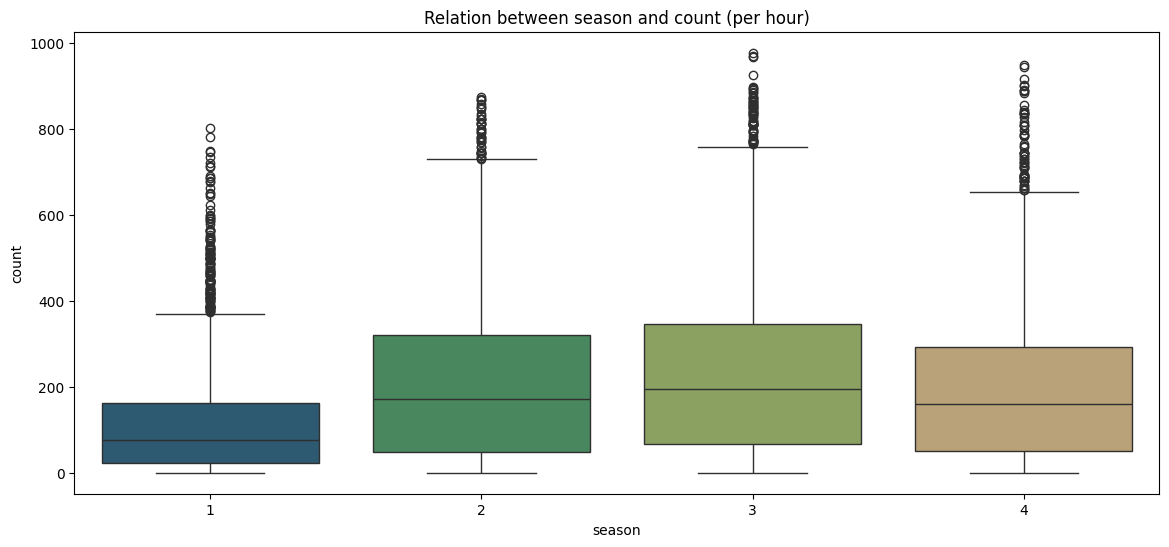

In [31]:
plt.figure(figsize = (14,6))
sns.boxplot(data=yulu, x='season', y= 'count', palette='gist_earth')
plt.title("Relation between season and count (per hour)")
plt.show()

<ipython-input-33-614c516d5fa2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=yulu, x='year', y= 'count', palette='bright')


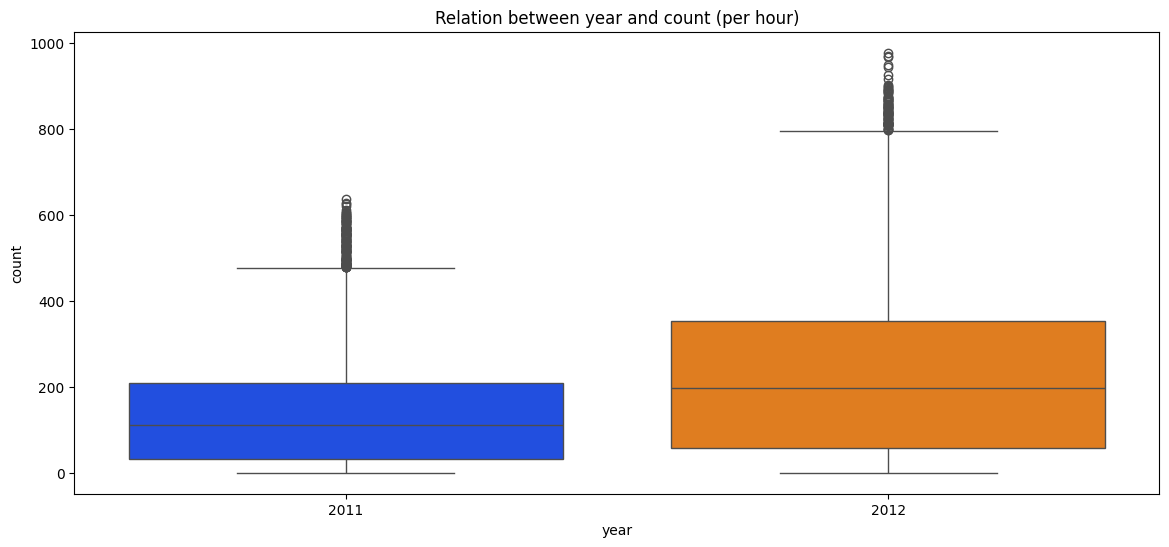

In [33]:
plt.figure(figsize = (14,6))
sns.boxplot(data=yulu, x='year', y= 'count', palette='bright')
plt.title("Relation between year and count (per hour)")
plt.show()

<ipython-input-36-409a5d743bb0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=yulu, x='month', y= 'count', palette='gist_earth')


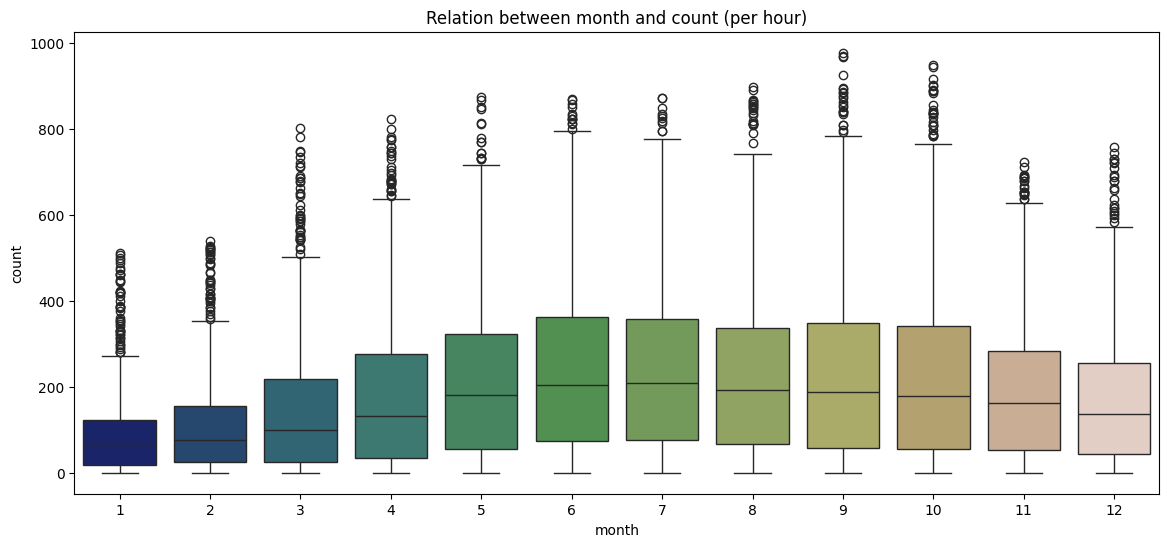

In [36]:
plt.figure(figsize = (14,6))
sns.boxplot(data=yulu, x='month', y= 'count', palette='gist_earth')
plt.title("Relation between month and count (per hour)")
plt.show()

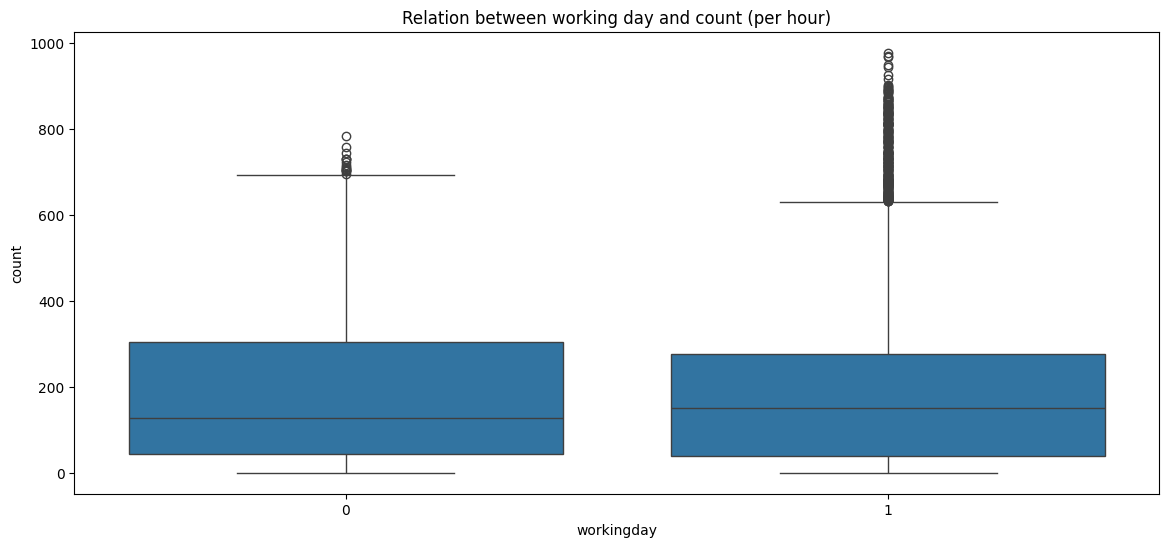

In [37]:
plt.figure(figsize = (14,6))
sns.boxplot(data=yulu, x='workingday', y= 'count')
plt.title("Relation between working day and count (per hour)")
plt.show()

- Season 3 has the highest bike rentals, followed by seasons 2, 4, and 1.
- Most bike rentals occur during weather condition 1, followed by 2 and 3, with weather 4 being rare.
- Temperature peaks in Season 3, aligning with high bike rentals.
- Humidity is highest in Season 3, correlating with peak bike rentals.
- Windspeed is lowest in Season 3, matching the trend of high bike rentals.
- Bike rentals peak around temperatures of 15 to 27 degrees Celsius, and humidity levels of 40 to 80.
- Daily bike rentals increased from 2011 to 2012.
- Rentals drop at temperatures below 10 degrees and above 30 degrees Celsius.
- Rentals are lowest in the first 3 months, peak from months 4 to 10, and decrease in months 11 and 12.
- Most rentals occur on Tuesdays and Fridays, and fewest on Sundays.
- Season 3 has the highest gross bike rentals, followed by Season 2.
- Peak rental times are around 5pm to 6pm, and lowest around 3am to 4am.
- Casual rentals decrease on weekdays and peak on weekends, while registered rentals peak on weekdays and decrease on weekends.

***
#**Hypothesis Testing**

In [38]:
# function to return result on the basis of the significance value(0.05)
def htResult(p_value):
    significance_level = 0.05
    if p_value <= significance_level:
        print('Reject NULL HYPOTHESIS')
    else:
        print('Fail to Reject NULL HYPOTHESIS')

###1. **Working Day has effect on number of electric cycles rented or not? Using 2- Sample T-Test**

- Null Hypothesis ( H0 ) - number of electric cycles rented on working days and non working days are same.

- Alternate Hypothesis ( HA ) - number of electric cycles rented on working days and non working days are different.

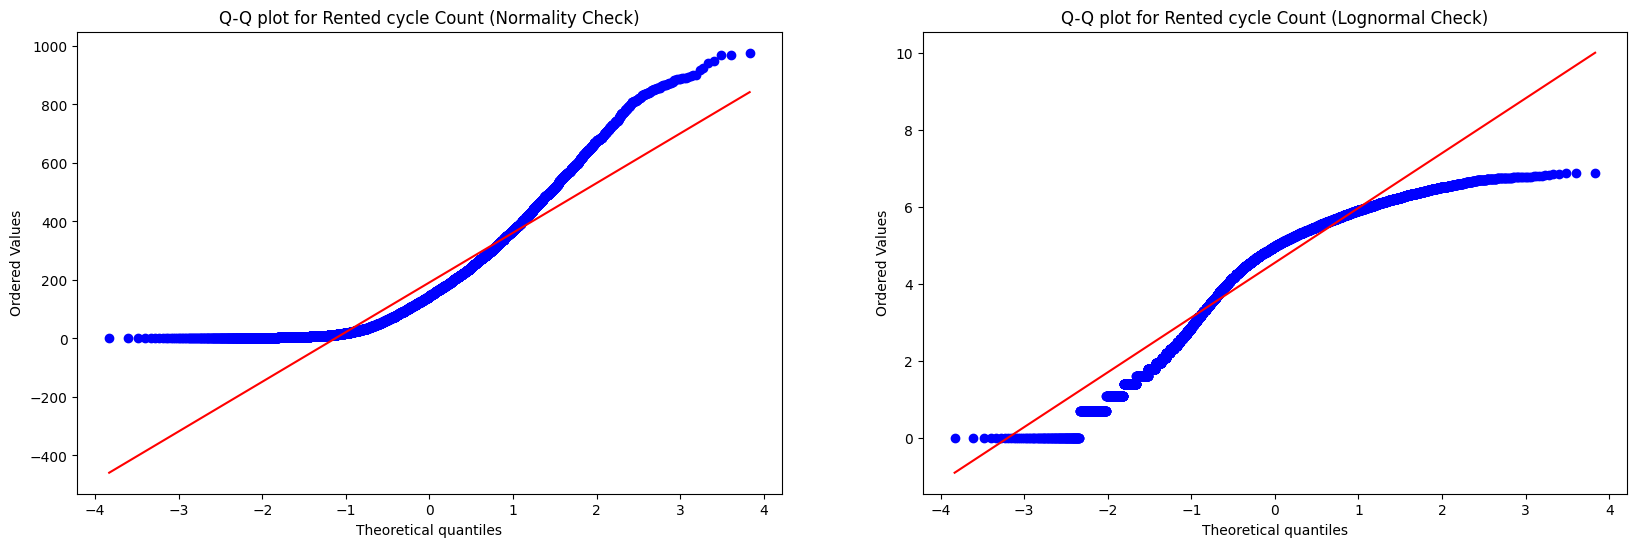

In [41]:
# Distribution check using QQ Plot
import scipy.stats as stats
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
stats.probplot(yulu['count'], plot= plt, dist="norm")
plt.title('Q-Q plot for Rented cycle Count (Normality Check)')
plt.subplot(1,2,2)
stats.probplot(yulu['count'].apply(np.log), plot= plt, dist="norm")
plt.title('Q-Q plot for Rented cycle Count (Lognormal Check)')
plt.show()

The count variable, representing the number of cycles rented per hour, does not appear to follow a normal distribution and does not satisfy QQ-Plots. Given that the Poisson distribution is suitable for modeling the count of events in a fixed interval of time or space with a known constant mean rate, it is worth checking if the count variable follows a Poisson distribution.

Considering the numerous factors that could affect the count variable, such as weather, time of day, temperature, working day status, and season, it is reasonable to assume that the count variable might follow a Poisson distribution when considering only working days.

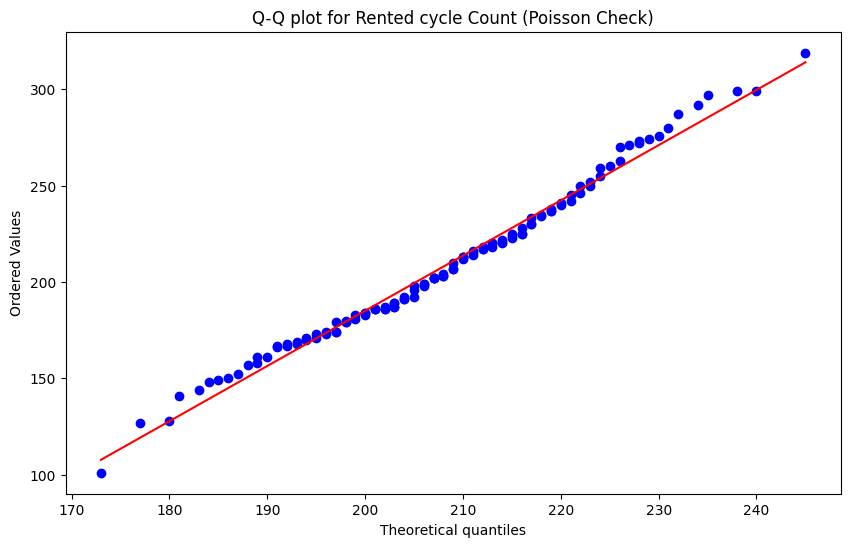

In [42]:
import datetime as dt
d1 = dt.datetime(2012, 4, 1, 11, 00, 00)
d2 = dt.datetime(2012, 6, 30, 15, 00, 00)
set1 = yulu[(yulu['season']==2) & (yulu['workingday']==1) & (yulu['year']==2012) & (yulu['weather']==1) &  (yulu['time'] >= d1.time()) &  (yulu['time'] <= d2.time())]['registered']
plt.figure(figsize=(10,6))
stats.probplot(set1, dist='poisson', sparams=(set1.mean(),), plot=plt)
plt.title('Q-Q plot for Rented cycle Count (Poisson Check)')
plt.show()

This looks like a Poisson Distribution

**Homogeneity of Variances using Levene's test**

- Null Hypothesis(H0) - Homogenous Variance

- Alternate Hypothesis(HA) - Non Homogenous variance

In [43]:
from scipy.stats import levene
workingday = yulu[yulu['workingday']==1]['count']
nonworkingday = yulu[yulu['workingday']==0]['count']
stat,p = levene(workingday,nonworkingday)

print('P-value :',p)

P-value : 0.9437823280916695


In [44]:
htResult(p)

Fail to Reject NULL HYPOTHESIS


We fail to reject null hypothesis, which means variance is same/similar.

In [46]:
# performoing two tailed test

workingday = yulu[yulu['workingday']==1]['count']
nonworkingday = yulu[yulu['workingday']==0]['count']
st,p = stats.ttest_ind(workingday,nonworkingday)
print('P-value :',(p))

P-value : 0.22644804226361348


In [47]:
htResult(p)

Fail to Reject NULL HYPOTHESIS


**We fail to reject null hypothesis, which means the number of electric cycles rented on working days and non working days are similar.**



***
###**2. Is the no.of cycles rented similar or different in different seasons?**
- Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for season 1,2,3 and 4 are same.

- Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is same for season 1,2,3 and 4 are different.

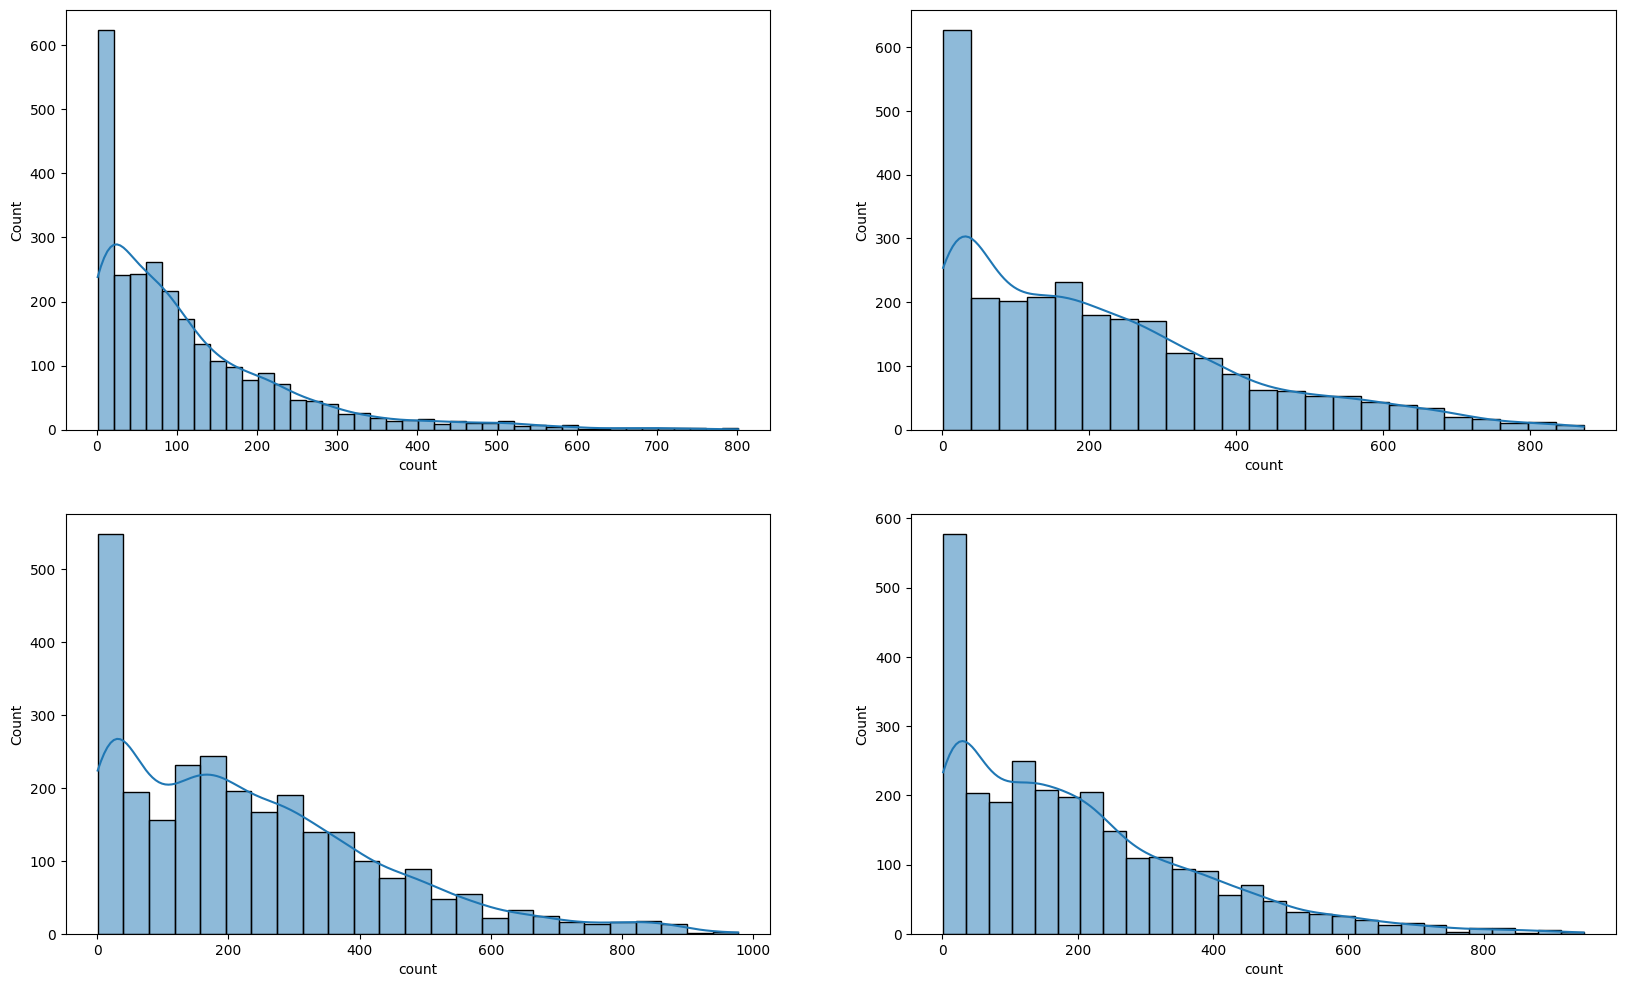

In [48]:
season1 = yulu[yulu['season']==1]['count']
season2 = yulu[yulu['season']==2]['count']
season3 = yulu[yulu['season']==3]['count']
season4 = yulu[yulu['season']==4]['count']

# Normality Check using QQ-Plots
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.histplot(data=season1, kde=True)
plt.subplot(2,2,2)
sns.histplot(data=season2, kde=True)
plt.subplot(2,2,3)
sns.histplot(data=season3, kde=True)
plt.subplot(2,2,4)
sns.histplot(data=season4, kde=True)
plt.show()

To perform ANOVA, we need our groups to be gaussian distributed. So, we will perform BOX-COX transform to change the distribution of these groups to normal.

In [50]:
season1= stats.boxcox(season1)[0]
season2= stats.boxcox(season2)[0]
season3= stats.boxcox(season3)[0]
season4= stats.boxcox(season4)[0]
stat,p = stats.f_oneway(season1, season2, season3, season4)
print('P-value :',p)

P-value : 0.0


In [51]:
htResult(p)

Reject NULL HYPOTHESIS


**We reject null hypothesis, which means the number of electric cycles rented on different seasons are different**




***
###**3. Does weather affect the no.of cycles rented?**

- Null Hypothesis ( H0 ) - Weather has no affect on the number of electric cycles rented

- Alternate Hypothesis( HA ) - Weather affects the number of electric cycles rented

<ipython-input-52-dc725493d7c2>:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(heavy_rain,ax=ax[1,1])


<Axes: xlabel='count', ylabel='Density'>

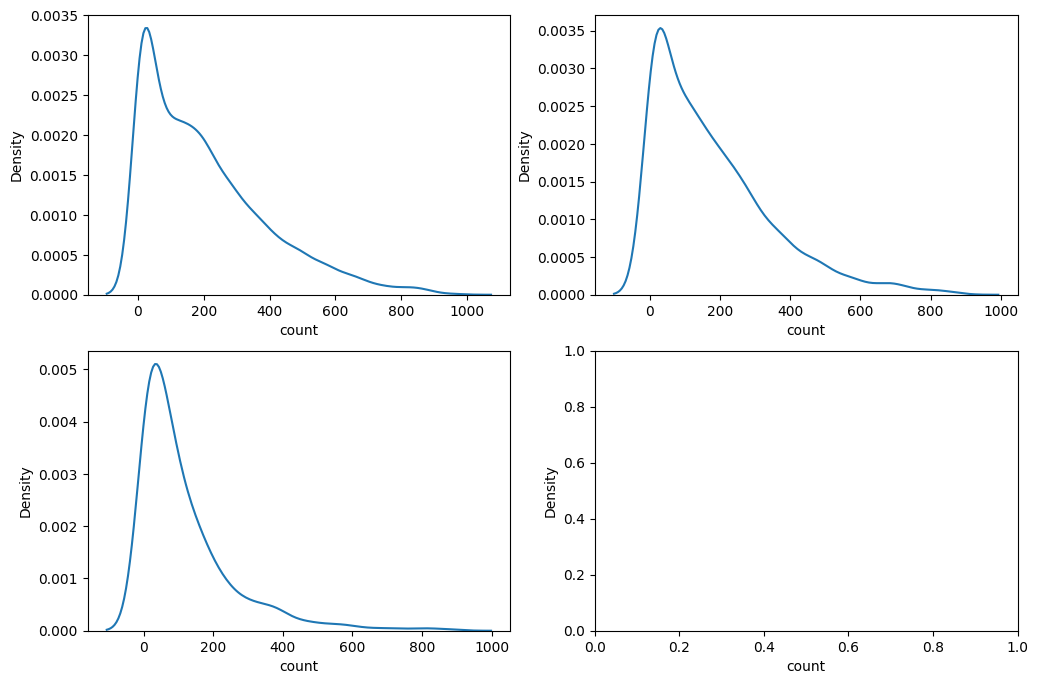

In [52]:
df = yulu
clear = df.loc[df['weather']==1,'count']
mist = df.loc[df['weather']==2,'count']
light_rain = df.loc[df['weather']==3,'count']
heavy_rain = df.loc[df['weather']==4,'count']
fig, ax = plt.subplots(2,2,figsize=(12,8))
sns.kdeplot(clear,ax=ax[0,0])
sns.kdeplot(mist,ax=ax[0,1])
sns.kdeplot(light_rain,ax=ax[1,0])
sns.kdeplot(heavy_rain,ax=ax[1,1])

In [57]:
from scipy.stats import kruskal
statistic, p = kruskal(clear, mist, light_rain, heavy_rain)

print("Kruskal-Wallis H Test:")
print("Statistic:", statistic)
print("p-value:", p)

Kruskal-Wallis H Test:
Statistic: 205.00216514479087
p-value: 3.501611300708679e-44


In [56]:
htResult(p)

Reject NULL HYPOTHESIS


**We reject null hypothesis, which means the number of electric cycles rented on different Weathers are different.**

***
###**4. Is the weather dependent on season? - Chi-square test**

- Null Hypothesis ( H0 ) -  Weather and Season are two independent columns

- Alternate Hypothesis( HA ) - Weather and Season are two indifferent columns

In [59]:
from scipy.stats import chi2_contingency
# Making a contingency table
contingency_table = pd.crosstab(df['season'], df['weather'])

# Perform Chi-Square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-Square Test:")
print("Chi2 statistic:", chi2)
print("p-value:", p_value)

Chi-Square Test:
Chi2 statistic: 49.158655596893624
p-value: 1.549925073686492e-07


In [60]:
htResult(p_value)

Reject NULL HYPOTHESIS


**We reject null hypothesis, which means that the season has impact on the weather.**